In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import classification_report,accuracy_score
import pandas as pd
from os.path import join
from importlib.machinery import SourceFileLoader
somemodule = SourceFileLoader('lab2_landmarks', r'C:\Users\salda\Documents\Tanulas\4th_year\ELEC0134_AMLS1\AMLS1Project\AMLS1Project\lab2_landmarks.py').load_module()
import lab2_landmarks as l2
from sklearn.model_selection import GridSearchCV


In [2]:
X, y= l2.extract_features_labels()

5000


In [3]:
X = X.reshape(X.shape[0], 68*2)
y = y.tolist()

# SVM Classifier

In [4]:
param_grid = [
  {'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['linear']},
  {'C': [0.01, 0.1, 1, 10, 100], 'gamma': [0.1,1,10], 'kernel': ['rbf']},
 ]

SVM = GridSearchCV(svm.SVC(gamma='scale'),param_grid, cv=5, return_train_score=False, verbose = 3)
SVM.fit(X, y)

svm_results = pd.DataFrame(SVM.cv_results_)
svmresults = svm_results[['param_kernel','param_C','param_gamma', 'mean_test_score', 'rank_test_score']].sort_values(by=['rank_test_score'])
svmresults

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END .............C=0.01, kernel=linear;, score=0.923 total time=   2.0s
[CV 2/5] END .............C=0.01, kernel=linear;, score=0.926 total time=   1.7s
[CV 3/5] END .............C=0.01, kernel=linear;, score=0.908 total time=   1.9s
[CV 4/5] END .............C=0.01, kernel=linear;, score=0.926 total time=   1.8s
[CV 5/5] END .............C=0.01, kernel=linear;, score=0.937 total time=   2.0s
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.916 total time=   5.0s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.929 total time=   5.1s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.908 total time=   4.1s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.914 total time=   6.1s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.933 total time=   4.6s
[CV 1/5] END ................C=1, kernel=linear;, score=0.910 total time=  46.8s
[CV 2/5] END ................C=1, kernel=linear

,param_kernel,param_C,param_gamma,mean_test_score,rank_test_score
0,linear,0.01,NaN,0.924088,1
1,linear,0.1,NaN,0.920125,2
2,linear,1,NaN,0.918457,3
3,linear,10,NaN,0.918248,4
4,linear,100,NaN,0.918040,5
17,rbf,100,0.1,0.506361,6
16,rbf,10,10,0.506361,6
15,rbf,10,1,0.506361,6
14,rbf,10,0.1,0.506361,6
13,rbf,1,10,0.506361,6


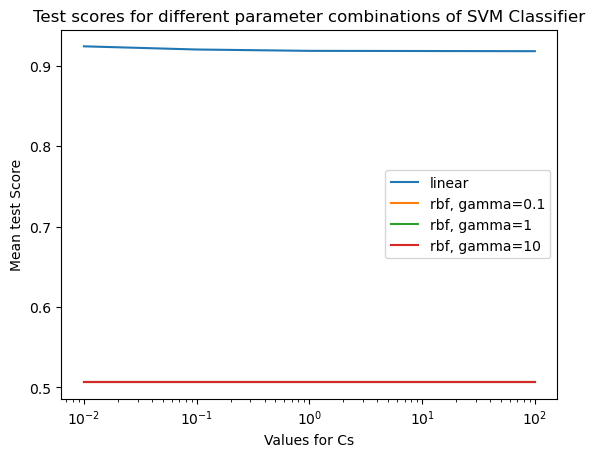

In [6]:
SVMlinear = svm_results[(svm_results['param_kernel'] == 'linear' )].sort_values(by = ['param_C'])
SVMrbf = svm_results[(svm_results['param_kernel'] == 'rbf' )]
SVMrbf01 = SVMrbf[(SVMrbf['param_gamma'] == 0.1 )].sort_values(by = ['param_C'])
SVMrbf1 = SVMrbf[(SVMrbf['param_gamma'] == 1 )].sort_values(by = ['param_C'])
SVMrbf10 = SVMrbf[(SVMrbf['param_gamma'] == 10 )].sort_values(by = ['param_C'])

plt.semilogx(SVMlinear['param_C'], SVMlinear['mean_test_score'], label = 'linear')
plt.semilogx(SVMrbf01['param_C'], SVMrbf01['mean_test_score'], label = 'rbf, gamma=0.1')
plt.semilogx(SVMrbf1['param_C'], SVMrbf1['mean_test_score'], label = 'rbf, gamma=1')
plt.semilogx(SVMrbf10['param_C'], SVMrbf10['mean_test_score'], label = 'rbf, gamma=10')

plt.xlabel('Values for Cs')
# Set the y axis label of the current axis.
plt.ylabel('Mean test Score')
# Set a title of the current axes.
plt.title('Test scores for different parameter combinations of SVM Classifier')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

# Random Forest

In [7]:
N = range(10,1011,50)

param_grid = [
  {'n_estimators': N, 'criterion': ['gini','entropy']}
 ]

RFC = GridSearchCV(RandomForestClassifier(random_state=42),param_grid, cv=5, return_train_score=False)
RFC.fit(X, y)

RFR_results = pd.DataFrame(RFC.cv_results_)
RFRresults = RFR_results[['param_n_estimators', 'param_criterion','mean_test_score', 'rank_test_score']].sort_values(by=['rank_test_score'])
RFRresults

,param_n_estimators,param_criterion,mean_test_score,rank_test_score
29,410,entropy,0.871533,1
41,1010,entropy,0.870699,2
28,360,entropy,0.870699,2
25,210,entropy,0.870490,4
30,460,entropy,0.870490,5
35,710,entropy,0.870282,6
36,760,entropy,0.870073,7
34,660,entropy,0.870073,7
38,860,entropy,0.869864,9
37,810,entropy,0.869864,10


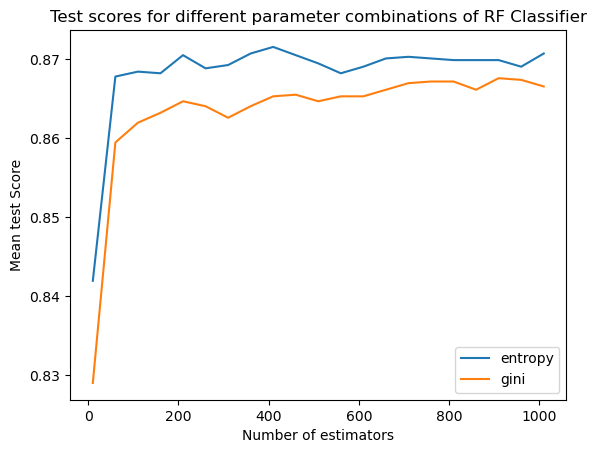

In [8]:
RFCentropy = RFRresults[(RFRresults['param_criterion'] == 'entropy' )].sort_values(by = ['param_n_estimators'])
RFCgini = RFRresults[(RFRresults['param_criterion'] == 'gini' )].sort_values(by = ['param_n_estimators'])

plt.plot(RFCentropy['param_n_estimators'], RFCentropy['mean_test_score'], label = 'entropy')
plt.plot(RFCgini['param_n_estimators'], RFCgini['mean_test_score'], label = 'gini')

plt.xlabel('Number of estimators')
# Set the y axis label of the current axis.
plt.ylabel('Mean test Score')
# Set a title of the current axes.
plt.title('Test scores for different parameter combinations of RF Classifier')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()